# CRISP DM

## Bussines Understanding

Problem pada Kasus ini adalah tentang informasi yang diperlukan untuk memprediksi apakah pasien memiliki penyakit jantung atau tidak, dengan menggunakan variabel klinis. Penyakit jantung sendiri umumnya mengacu pada pada kondisi yang melibatkan penyempitan atau pemblokiran pembuluh darah yang bisa menyebabkan serangan jantung, stroke atau nyeri dada (angina) akibat olahraga yang dapat disebabkan oleh iskemia miokard. Pemeriksaan penyakit jantung dapat dilakukan melalui berbagai cara berikut EKG, Peneriksaan darah, dan Angiography. Angiografi adalah pemeriksaan pembuluh darah menggunakan zat kontras khusus dan memanfaatkan Rontgen. Namun, angiografi tidak disarankan untuk dilakukan pada seseorang yang memiliki riwayat alergi dengan zat kontras, menderita gangguan pembekuan darah, kerusakan ginjal, memiliki tekanan darah tinggi yang sulit terkendali, aritmia, anemia, dan demam. Maka dari itu, disediakan nya kumpulan data ini dengan bertujuan untuk memprediksi dan mengevaluasi bagaimana karakteristik ini berinteraksi satu sama lain untuk menentukan tingkat risiko individu atau pasien, serta untuk mengembangkan masalah kardiovaskular yang menyebabkan gagal jantung atau stroke. Tak hanya itu, dengan menganalisis kombinasi variabel klinis yang akan dijelaskan, saya membantu profesional perawatan kesehatan dalam merawat pasien dengan lebih baik untuk mencoba dan memerangi penyakit kardiovaskular bahkan sebelum memiliki kesempatan untuk berakar (semakin parah).

- Dataset : (https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?select=heart.csv)



## Data Understanding

Dari pengumpulan data yang telah diambil mengenai penyakit jantung yang di derita oleh pasien, terdapat 12 kolom yang berisi 1 kolom
float64 dan 12 kolom integer. Jika menggunakan Logistic Regression, maka hanya kolom yang berisi float64 
atau int64 saja yang bisa diolah. Berikut atribut-atribut nya :

0. age : umur pasien penderita serangan jantung.
1. sex : Jenis Kelamin pasien (0 = Perempuan, 1 = Laki-Laki)
2. cp : Tipe dari nyeri dada

        — Value 1: nyeri dada normal
        — Value 2: nyeri dada anormal
        — Value 3: tidak ada nyeri dada
        — Value 4: asymptomatic

3. trtbps : Tekanan darah pasien (mm Hg) 
4. chol : kolestoral dalam mg/dl diambil melalui sensor BMI.
5. fbs: (gula darah ketika puasa > 120 mg/dl) (1 = true; 0 = false)
6. restecg :

        — Value 0: normal
        — Value 1: memiliki gelombang ST-T abnormal
        — Value 2: menunjukkan kemungkinan atau hipertrofi ventrikel kiri dengan kriteria Estestes.

7. thalachh :  Denyut jantung maksimum tercapai
8. exng : olahraga untuk induksi angina (1 = yes; 0 = no)
9. oldpeak : penurunan ST yang diakibatkan oleh latihan relative terhadap saat istirahat.
10. slp : perubahan kemampuan bicara
11. caa : jumlah pembuluh darah utama
12. thall : Tidak ada penjelasan yang diberikan oleh deskripsi data UCI

        - 1 = normal
        - 2 = fixed defect
        - 3 = reversable defect
        
13. output : 0 = kemungkinan kecil pasien terkena serangan jantung, 1 = kemungkinan besar pasien terkena serangan jantung.

# Import library

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Load Dataset

In [3]:
heart = pd.read_csv("heart.csv")

In [4]:
heart.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# DATA PREPARATION

# pisahkan data atribut dengan label

In [6]:
X = heart.drop(columns=['output'], axis=1)
Y = heart['output']

In [7]:
print(X)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  
0      0      1  
1      0      2

In [8]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64


# Visualisasi Data

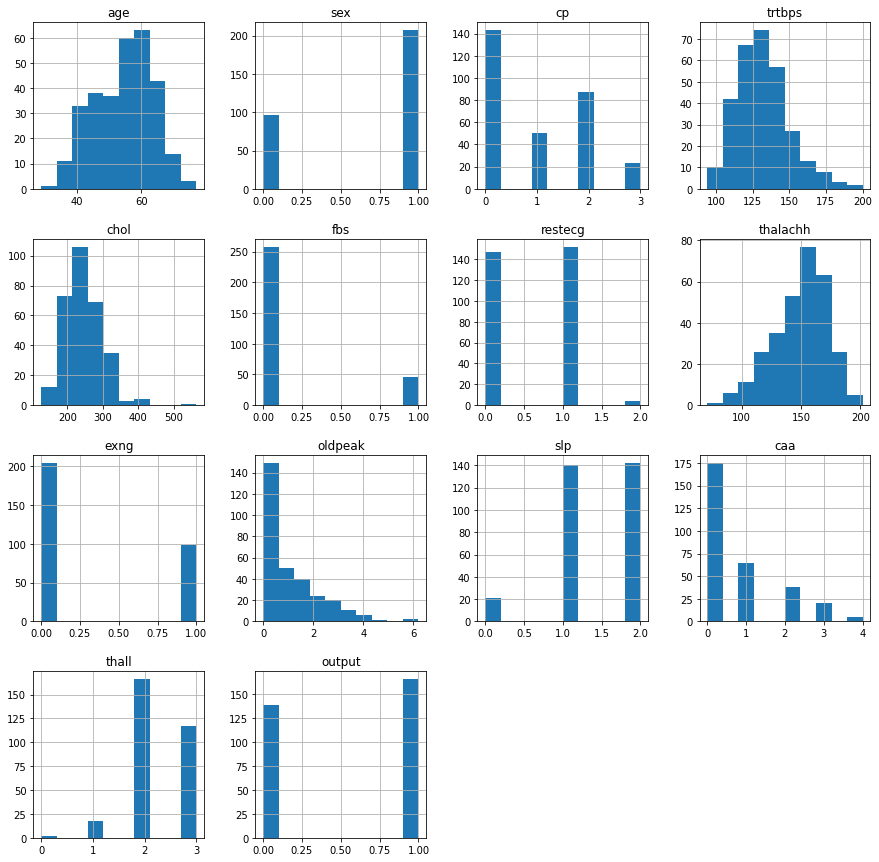

In [94]:
p = df.hist(figsize = (15,15))

Dari grafik yang ada dapat dianalisa:

1. Sebagian besar penderita penyakit jantung berumur antara 40–60 tahun.
2. Penderita serangan jantung sebagian besar diderita oleh laki-laki.
3. Dapat di lihat dalam grafik, sebagian besar orang yang merasakan nyeri dada yang normal tidak menderita penyakit jantung, berbeda ketika dilihat adanya nyeri dada yang tidak normal angka penderita penyakit jantung semakin meningkat.
4. Sebagian besar penderita penyakit jantung memiliki tekanan darah tinggai dengan nilai kisaran 120-150 mm/Hg.
5. Hampir sebagian orang yang memiliki kolestrol memiliki penyakit jantung, walaupun ada sebagian yang tidak memiliki.
6. Gula darah tidak terlalu berpengaruh dengan penyakit jantung, dikarenakan pada grafik terlihat bahwa orang yang memiliki gula darah cukup tinggi menunjukkan angka kasus penderita jantung yang rendah.
7. Pada penderita penyakit jantung sebagian besar memiliki hasil EKG dengan hasil gelombang ST-T abnormal.
8. Orang yang memiliki nilai tinggi (antara 125–175) berkemungkinan besar memiliki penyakit jantung.
9. Pada oldpeak (depresi ST yang diakibatkan oleh latihan relative terhadap saat istirahat) penderita penyakit jantung akan memiliki nilai yang kecil dibandingkan dengan orang yang tidak penderita penyakit jantung.
10. Semakin besar nilai slp maka semakin besar kemungkinan menderita penyakit jantung.
11. Ketika orang memiliki thall tipe 2 maka akan semakin besar juga kemungkinan orang tersebut menderita penyakit jantung.
12. Pada grafik terakhir, data penderita penyait jantung lebih banyak dibanding orang yang tidak menderita penyakit jantung.

# Split data

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [10]:
print(X.shape, x_train.shape, x_test.shape)

(303, 13) (242, 13) (61, 13)


# MODELLING DATA

# Membuat model training

In [11]:
model = LogisticRegression()

In [12]:
model.fit(x_train, y_train)

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

# EVALUATION

# Evaluasi model

In [13]:
x_train_predict = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_predict, y_train)

In [14]:
print('Akurasi data training : ', training_data_accuracy)

Akurasi data training :  0.8512396694214877


In [15]:
x_test_predict = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_predict, y_test)

In [16]:
print('Akurasi data testing : ', test_data_accuracy)

Akurasi data testing :  0.819672131147541


# Model Prediksi

In [17]:
input_data = (68, 1, 2, 118, 277, 0, 1, 151, 0, 1, 2, 1, 3)
input_data_numpy = np.asarray(input_data)
data_reshaped = input_data_numpy.reshape(1, -1)
predict = model.predict(data_reshaped)
print(predict)

if (predict[0] == 0):
    print('Kemungkinan Kecil Pasien terkena Serangan Jantung')
else:
    print('Kemungkinan Besar Pasien terkena Serangan Jantung')

[1]
Kemungkinan Besar Pasien terkena Serangan Jantung


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


# DEPLOYMENT

# Save Model

In [18]:
import pickle

filename = 'heart_attack.sav'
pickle.dump(model, open(filename, 'wb'))